In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import unicodedata
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2

In [4]:
import torch
from IPython.core.display import clear_output

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pwd

/content


In [6]:
%cd /content/drive/MyDrive/PROJECT_PADHAI

/content/drive/MyDrive/PROJECT_PADHAI


In [7]:
!pwd

/content/drive/MyDrive/PROJECT_PADHAI


In [9]:

def index_by_unicode(begin,end,start_index ):
    # convert hexadecimal string to integers
    l_range = int(begin, 16)
    u_range = int(end, 16)

    letter_index = dict()
    i = start_index
    for char_code in range(l_range, u_range + 1):
        char_index = chr(char_code)
        char_name = unicodedata.name(char_index)
        letter_index[char_name] = i
        i += 1
    return letter_index, i

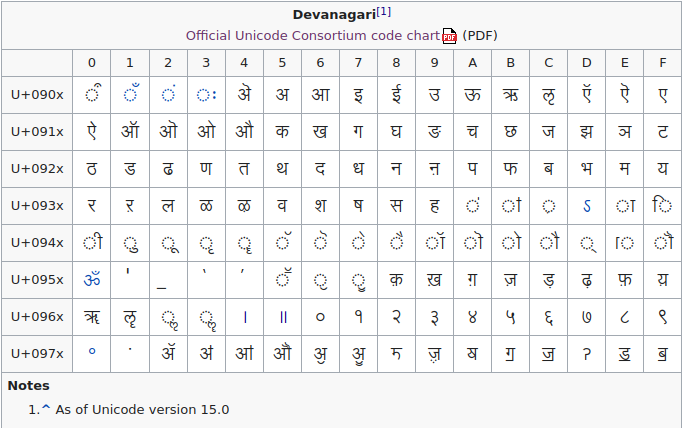

Building vocabulary for Devnagari

In [10]:
# i=0 -> start , i=1 -> end, i=2 -> pad
i = 3
letter_index, index = index_by_unicode("0900", "094D", i)
digits, index = index_by_unicode("0966", "096F", index)
om, index = index_by_unicode("0950", "0950", index)
additional, index = index_by_unicode("0958", "095F", index)

letter_index.update(digits)
letter_index.update(om)
letter_index.update(additional)

In [11]:
letter_index

{'DEVANAGARI SIGN INVERTED CANDRABINDU': 3,
 'DEVANAGARI SIGN CANDRABINDU': 4,
 'DEVANAGARI SIGN ANUSVARA': 5,
 'DEVANAGARI SIGN VISARGA': 6,
 'DEVANAGARI LETTER SHORT A': 7,
 'DEVANAGARI LETTER A': 8,
 'DEVANAGARI LETTER AA': 9,
 'DEVANAGARI LETTER I': 10,
 'DEVANAGARI LETTER II': 11,
 'DEVANAGARI LETTER U': 12,
 'DEVANAGARI LETTER UU': 13,
 'DEVANAGARI LETTER VOCALIC R': 14,
 'DEVANAGARI LETTER VOCALIC L': 15,
 'DEVANAGARI LETTER CANDRA E': 16,
 'DEVANAGARI LETTER SHORT E': 17,
 'DEVANAGARI LETTER E': 18,
 'DEVANAGARI LETTER AI': 19,
 'DEVANAGARI LETTER CANDRA O': 20,
 'DEVANAGARI LETTER SHORT O': 21,
 'DEVANAGARI LETTER O': 22,
 'DEVANAGARI LETTER AU': 23,
 'DEVANAGARI LETTER KA': 24,
 'DEVANAGARI LETTER KHA': 25,
 'DEVANAGARI LETTER GA': 26,
 'DEVANAGARI LETTER GHA': 27,
 'DEVANAGARI LETTER NGA': 28,
 'DEVANAGARI LETTER CA': 29,
 'DEVANAGARI LETTER CHA': 30,
 'DEVANAGARI LETTER JA': 31,
 'DEVANAGARI LETTER JHA': 32,
 'DEVANAGARI LETTER NYA': 33,
 'DEVANAGARI LETTER TTA': 34,
 'DEVA

Function to convert character into numerical index

In [12]:
def get_labels(text, letter_index):
    labels = list()
    for char in text:
        name = unicodedata.name(char)
        index = letter_index[name]
        labels.append(index)
    return labels

In [13]:
annotation_path = '/content/drive/MyDrive/PROJECT_PADHAI/Computer_Vision/PADHAI_DL/PADHAI_DL/Text_Recognition/recognition_real_dataset/cropped_data/annotations.txt'
with open(annotation_path) as file:

    labels = list()
    for line in file.readlines():
        hindi_text = line.split('\t')[1].strip()
        print(hindi_text)
        try:
            labels.append(get_labels(hindi_text, letter_index))
        except KeyError:
            pass
    # find max length of name for padding
    max_len = max([len(label) for label in labels]) + 2  # including start and stop symbols

जल
शोध
न
संयंत्र
बिना
आज्ञा
प्रवेश
निषेध
नगर
पालिका
परिषद
इटारसी
जिला
होशंगाबाद
मप्र
स्वच्छ
भारत
स्वच्छ
भारत
अभियान
स्वच्छता
का
ध्यान
रखें
गंदगी
न
करें
शहर
को
खुले
में
शौच
से
मुक्त
कराना
है
शौचालय
का
उपयोग
करें
महिला
पुरुष
मूर्तिकार
राजदीप
सोनू
ॐ
ॐ
सुनील
लांड्री
९७१३९७६५२०
शादी
कार्ड
संदीप
प्रिंटर्स
बुक
बाइंडिंग
मल्टीकलर
विजिटिंग
कार्ड
समस्त
छपाई
के
कार्य
सूचना
कार्यालय
के
सामने
वाहन
खड़ा
न
करें
अन्यथा
अर्थदंड
रू
व
न्यायिक
कार्यवाही
की
जावेगी
मुख्य
कल्याण
निरीक्षक
इटारसी
भारतीय
रेल
शुभ
बैटरी
चार्जर
रूम
राज
चाट
सेंटर
शिव
कंप्यूटर
सेल्स
एण्ड
सर्विस
शिव
पटैल
धूम्रपान
निषेध
रेल
परिसर
ट्रेन
में
धूम्रपान
तम्बाकू
का
सेवन
करना
रेल
अधिनियम
की
धारा
व
के
तहत
दण्डनीय
अपराध
है
हनुमान
धाम
दादा
की
जय
प्लेटफार्म
न
४
व
सेल्फी
विथ
इटारसी
सरोवर
के
फेसबुक
पेज
को
लाइक
करे
एवं
उस
पर
अपनी
सेल्फी
डाले
प
मध्य
रेल
वृन्दावन
विहार
कालोनी
वर्मा
कालोनी
के
पीछे
फोटो
कापी
लेमिनेशन
चाय
एवं
स्वल्पाहार
रेल
आहार
इटारसी
जं
भगवान
नित्यानंद
संगीत
महा
विद्यालय
प्रयाग
संगीत
समिति
इलाहबाद
से
संबध्द
भोपाल
सहकारी
दुग्ध
संघ
मर्याद

In [14]:
labels

[[31, 53],
 [57, 78, 42],
 [43],
 [59, 5, 50, 5, 39, 80, 51],
 [47, 66, 43, 65],
 [9, 31, 80, 33, 65],
 [45, 80, 51, 56, 74, 57],
 [43, 66, 58, 74, 42],
 [43, 26, 51],
 [45, 65, 53, 66, 24, 65],
 [45, 51, 66, 58, 41],
 [10, 34, 65, 51, 59, 67],
 [31, 66, 53, 65],
 [60, 78, 57, 5, 26, 65, 47, 65, 41],
 [49, 45, 80, 51],
 [59, 80, 56, 29, 80, 30],
 [48, 65, 51, 39],
 [59, 80, 56, 29, 80, 30],
 [48, 65, 51, 39],
 [8, 48, 66, 50, 65, 43],
 [59, 80, 56, 29, 80, 30, 39, 65],
 [24, 65],
 [42, 80, 50, 65, 43],
 [51, 25, 74, 5],
 [26, 5, 41, 26, 67],
 [43],
 [24, 51, 74, 5],
 [57, 60, 51],
 [24, 78],
 [25, 68, 53, 74],
 [49, 74, 5],
 [57, 79, 29],
 [59, 74],
 [49, 68, 24, 80, 39],
 [24, 51, 65, 43, 65],
 [60, 75],
 [57, 79, 29, 65, 53, 50],
 [24, 65],
 [12, 45, 50, 78, 26],
 [24, 51, 74, 5],
 [49, 60, 66, 53, 65],
 [45, 68, 51, 68, 58],
 [49, 69, 51, 80, 39, 66, 24, 65, 51],
 [51, 65, 31, 41, 67, 45],
 [59, 78, 43, 69],
 [91],
 [91],
 [59, 68, 43, 67, 53],
 [53, 65, 5, 36, 80, 51, 67],
 [90, 88

In [16]:
cols = ['name', 'text', 'labels', 'unpadded_length']  # Features
data_list = []  # List to store each row of data

with open(annotation_path) as file:
    for line in tqdm(file.readlines()):
        data = {}
        img_path, hindi_text = line.split('\t')[:2]
        img_path = img_path.strip()
        hindi_text = hindi_text.strip()

        data['name'] = img_path
        data['text'] = f"<start> {hindi_text} <stop>"
        label = [0]  # Initialize with the <start> token

        try:
            label.extend(get_labels(hindi_text, letter_index))
        except KeyError:
            continue  # Skip to the next iteration if there's a KeyError

        label.append(1)  # End with the <stop> token
        data['unpadded_length'] = int(len(label))
        extra_padding = max_len - len(label)
        label.extend([2] * extra_padding)  # Add padding
        data['labels'] = label

        data_list.append(data)  # Append each row as a dictionary

# Create the DataFrame from the list of dictionaries
annotation_df = pd.DataFrame(data_list, columns=cols)


100%|██████████| 1740/1740 [00:00<00:00, 108416.98it/s]


In [ ]:
annotation_df.head()

,name,text,unpadded_length,labels
0,cropped_dir/0.jpg,<start> जल <stop>,4.0,"[0, 31, 53, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2..."
1,cropped_dir/1.jpg,<start> शोध <stop>,5.0,"[0, 57, 78, 42, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,cropped_dir/2.jpg,<start> न <stop>,3.0,"[0, 43, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
3,cropped_dir/3.jpg,<start> संयंत्र <stop>,9.0,"[0, 59, 5, 50, 5, 39, 80, 51, 1, 2, 2, 2, 2, 2..."
4,cropped_dir/4.jpg,<start> बिना <stop>,6.0,"[0, 47, 66, 43, 65, 1, 2, 2, 2, 2, 2, 2, 2, 2,..."


In [17]:
annotation_df.to_pickle('/content/drive/MyDrive/PROJECT_PADHAI/Computer_Vision/PADHAI_DL/annot.pkl')
annotation_df.to_csv('/content/drive/MyDrive/PROJECT_PADHAI/Computer_Vision/PADHAI_DL/annot.csv')

In [18]:
# Splitting into train & test data
train_df, test_df = train_test_split(annotation_df, test_size=0.10, random_state= 0, shuffle=True)
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state= 0, shuffle=True)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(1487, 4)
(79, 4)
(174, 4)


In [19]:
class Hindi_DataLoader(Dataset):
    def __init__(self, root_directory,df=None, transform=None):
        self.transform = transform
        self.annotation_df = df
        self.images = [] # List of images to be recognized
        self.labels = [] # List of index tensors fro each word
        self.unpadded_length = [] # List of actual length of word: <start><word><stop>

        for index in tqdm(range(len(self.annotation_df))):
            row = self.annotation_df.iloc[index]
            image_path = os.path.join(root_directory, row['name'])
            img = cv2.imread(image_path)
            try:
                img = Image.fromarray(img)
            except:
                continue
            self.images.append(img)
            self.labels.append(torch.as_tensor(row['labels'], dtype=torch.long))
            self.unpadded_length.append(torch.as_tensor(row['unpadded_length'], dtype=torch.long))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        char_length = self.unpadded_length[index]
        if self.transform:
            image = self.transform(image)
        return image,label, char_length


In [20]:
"""Inception-v3 will work with size >= 299 x 299 during training
when aux_logits is True, otherwise it can work with size as small as 75 x 75."""
def get_transform(train=False):
    T = list()
    T.append(transforms.Resize((299, 299)))  # image size input for inception_v3
    T.append(transforms.ToTensor())
    return transforms.Compose(T)

In [21]:
root_directory = '/content/drive/MyDrive/PROJECT_PADHAI/Computer_Vision/PADHAI_DL/PADHAI_DL/Text_Recognition/recognition_real_dataset/cropped_data'
train_dataset = Hindi_DataLoader(root_directory,df=train_df,transform=get_transform(train=True))
val_dataset = Hindi_DataLoader(root_directory,df=val_df, transform=get_transform())
test_dataset = Hindi_DataLoader(root_directory, df=test_df, transform=get_transform())

100%|██████████| 174/174 [01:42<00:00,  1.69it/s]


tensor([ 0, 43, 26, 51,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])


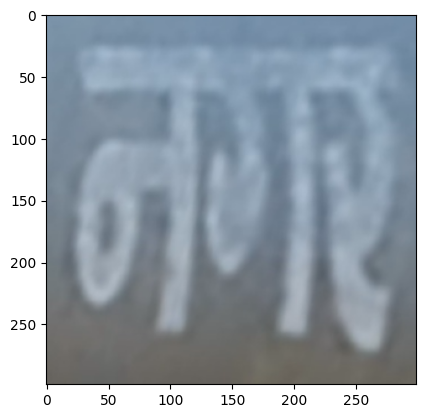

In [22]:
sample_img, sample_label,sample_length = train_dataset[5]
print(sample_label)
plt.imshow(sample_img.permute(1,2,0))


The freeze_layer variable is assumed to contain the name of a layer in the model that you want to keep trainable.

E.g, if you want to keep the weights of the layer Mixed_7c.branch_pool.conv trainable, you would set freeze_layer to 'Mixed_7c.branch_pool.conv'.

Function iterates through all the parameters in the model and sets the requires_grad attribute to False for all parameters except those that belong to the layer specified in freeze_layer.

Finally, a new classifier block is defined and set as the last layer of the model.

In [23]:
class Encoder(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.encoder = models.inception_v3(pretrained=True)
        self.encoder.aux_logits = False

        self.encoder.fc = nn.Linear(in_features=2048, out_features=output_size, bias=False)

        # Freeze the model params except the classifier block of the network
        freeze_layer = 'Mixed_7c.branch_pool.conv.weight'
        for name, param in self.encoder.named_parameters():
            if name == freeze_layer:
                break
            param.requires_grad = False

    def forward(self, input):
        output = self.encoder(input).cuda()
        return output

pack_padded_sequence:

Padded elements are removed and replaced with a single tensor that contains only the non-zero elements

In [24]:
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size, pad_id, num_layers=1, dropout=0, bi=False):
        super().__init__()
        self.pad_id = pad_id
        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=self.pad_id)
        self.gru= nn.GRU(hidden_size, hidden_size, num_layers=num_layers, bias=False, batch_first=True, dropout=dropout, bidirectional=bi)

        if bi is True:
            hidden_size = 2 * hidden_size
        self.linear = nn.Linear(hidden_size, output_size, bias=False)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input, hidden_state, lengths):
        embedding = self.embedding(input)
        packed_seq = nn.utils.rnn.pack_padded_sequence(embedding, lengths, batch_first=True, enforce_sorted=False).cuda()
        output,h_state = self.gru(packed_seq, hidden_state)
        output, _ = nn.utils.rnn.pad_packed_sequence(output, batch_first=True)
        output = self.linear(output)
        output = self.softmax(output)
        return output, h_state

In [25]:
# Hyperparameters
epochs = 25
log_step = 20 # Interval for average loss calculation
batch_size = 32
num_workers = 4 # Four workers will simulataneously put data into RAM
encoder_out = 1024 # size output tensor from inceptionV3
encoder_lr = 0.001
sequence_len = 16
hidden_size = encoder_out
output_size = 100
decoder_lr =  0.001
bidirectional = False
dropout = 0.3
num_layers = 3
num_directions = 2 if bidirectional else 1

In [26]:
# pytorch data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [27]:
# Loss criteria
loss = nn.NLLLoss() # Negative log likelihood loss
sos_id = 0
eos_id = 1
pad_id = 2
# Model and optimizer variables
encoder = Encoder(encoder_out).cuda()
encoder_optim = torch.optim.Adam(encoder.parameters(), lr=encoder_lr)

decoder = Decoder(hidden_size, output_size, pad_id, num_layers=num_layers, dropout=dropout, bi=bidirectional).cuda()
decoder_optim = torch.optim.Adam(decoder.parameters(), lr=decoder_lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 86.5MB/s] 


In [28]:
def train_epoch(loader,encoder,decoder,encoder_optim,decoder_optim,criterion, log_step = 10):

    loss_profile = []
    eos = 1
    for step, (images, labels, lengths) in enumerate(loader):
        batch_size = lengths.size()[0]
        encoder_optim.zero_grad()
        decoder_optim.zero_grad()
        images = images.cuda()
        labels = labels.cuda()
        context = encoder(images).cuda()
        context = context.view(1,-1,encoder_out)
        context = torch.cat([context]*(num_directions*num_layers),dim = 0)
        hidden_state = context
        loss = 0
        decoder_output, hn_state = decoder(labels,hidden_state,lengths)
        max_seq_size = decoder_output.size()[1]
        loss_mask = torch.zeros(batch_size,max_seq_size,device= "cuda")

        for i in range(batch_size):
            length = lengths[i].item()
            loss_mask[i,:length] = 1
        for i in range(max_seq_size-1):
            mask = loss_mask[:,i].view(-1,1)
            output = decoder_output[:,i,:]
            output = output*mask
            loss+=criterion(output,labels[:,i+1])
        loss.backward()
        decoder_optim.step()
        encoder_optim.step()
        loss_profile.append(loss.item())
        if step % log_step == 0:
            print(f"Training Loss: {loss.item()}")
    return loss_profile

In [29]:
loss_profile = []
dec_lr_scheduler = torch.optim.lr_scheduler.StepLR(decoder_optim, step_size=10, gamma=0.1)
enc_lr_scheduler = torch.optim.lr_scheduler.StepLR(encoder_optim, step_size=10, gamma=0.1)

# Training

In [30]:
encoder.train()
decoder.train()
for epoch_idx in range(epochs):
    print(f'Epoch: {epoch_idx + 1}')
    epoch_loss = train_epoch(train_loader, encoder, decoder, encoder_optim, decoder_optim, loss, log_step=log_step)
    loss_profile.extend(epoch_loss)
    dec_lr_scheduler.step()
    enc_lr_scheduler.step()

Epoch: 1
Training Loss: 31.714862823486328
Training Loss: 16.33448600769043
Training Loss: 15.592645645141602
Epoch: 2
Training Loss: 12.742169380187988
Training Loss: 14.020356178283691
Training Loss: 11.153931617736816
Epoch: 3
Training Loss: 10.781184196472168
Training Loss: 10.492996215820312
Training Loss: 9.010675430297852
Epoch: 4
Training Loss: 8.389961242675781
Training Loss: 11.677994728088379
Training Loss: 9.71675968170166
Epoch: 5
Training Loss: 7.7659220695495605
Training Loss: 8.100366592407227
Training Loss: 7.5702128410339355
Epoch: 6
Training Loss: 7.395212173461914
Training Loss: 9.062728881835938
Training Loss: 6.764159202575684
Epoch: 7
Training Loss: 4.7257561683654785
Training Loss: 6.042341232299805
Training Loss: 6.809646129608154
Epoch: 8
Training Loss: 5.504319190979004
Training Loss: 3.8881783485412598
Training Loss: 4.953268051147461
Epoch: 9
Training Loss: 4.44508695602417
Training Loss: 5.330779552459717
Training Loss: 4.868174076080322
Epoch: 10
Training

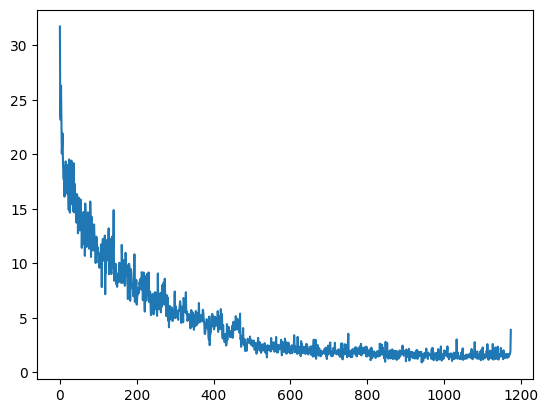

In [31]:
plt.plot(loss_profile)

In [32]:
def predict(image, encoder, decoder, sos_id, eos_id):
    # Put the models in the evaluation mode
    max_seq_len = sequence_len

    image = image.unsqueeze(0).cuda()

    with torch.no_grad():
        context = encoder(image)
        context = context.view(1, -1, encoder_out)

        context = torch.cat([context] * (num_directions * num_layers) , dim=0)
        # hidden_state = (context, torch.zeros(context.shape).cuda())
        hidden_state = context
        input = torch.as_tensor([[sos_id]], dtype=torch.long).cuda()
        values = []
        indices = []
        for i in range(max_seq_len):
            decoder_output, hidden_state = decoder(input, hidden_state, torch.as_tensor([1], dtype=torch.long, device='cpu'))
            preds = decoder_output.view(-1, output_size)
            preds = torch.topk(preds, 1)
            value, index = preds.values, preds.indices.item()
            values.extend(torch.exp(value))
            indices.append(index)
            input = preds.indices

            if index == eos_id:
                break
    return values, indices

tensor([ 0, 48, 65, 51, 39, 67, 50,  1,  2,  2,  2,  2,  2,  2,  2,  2])
[0.2528916597366333, 0.40348556637763977, 0.5089924931526184, 0.7842533588409424, 0.9586501121520996, 0.9962789416313171, 0.9692593216896057, 0.9981357455253601, 0.9996556043624878]
[8, 26, 51, 47, 39, 80, 39, 67, 1]


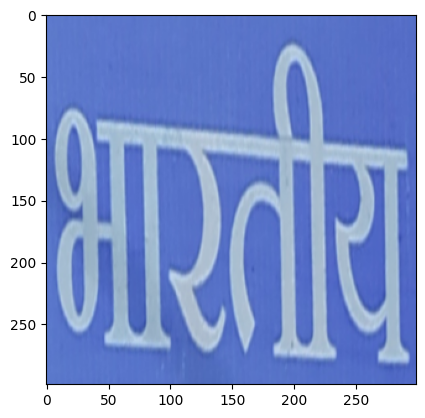

In [33]:
encoder.eval()
decoder.eval()

image, label, _ = val_dataset[10]
plt.imshow(image.permute(1,2,0))
print(label)

# get the predictions
values, indices = predict(image, encoder, decoder, 0, 1)
print([value.item() for value in values])
print(indices)